In [89]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import sympy as sym
import random as rand
import Data
import Functions_module_beta as fn
from Functions_module_beta import MatrixAction, SystemAction

In [81]:
bell_V = [fn.phiplus_V,fn.phiminus_V,fn.psiplus_V,fn.psiminus_V]
bell_C = [fn.phiplus_C,fn.phiminus_C,fn.psiplus_C,fn.psiminus_C]


mirror_list = [12,13,14,23,24,34]


#Chekcs out:  phiplus



def radians(degrees):           # degrees  to radians
    rad = (sym.pi/180)*degrees
    return rad 


#######_Definitions_######

theta = sym.symbols('theta')
theta = 43                                          # theta in degrees, default 45 gives Bell states

phiplus_like_V = [fn.ten_states_2,fn.ten_states_5]                      #Bell-like vectors
phiminus_like_V = [fn.ten_states_2,fn.ten_states_5]
psiplus_like_V = [fn.ten_states_3,fn.ten_states_4]
psiminus_like_V = [fn.ten_states_3,fn.ten_states_4]

phiplus_like_C = [sym.cos(radians(theta)),sym.sin(radians(theta))]              #Bell-like coeffs ie. disturbing C slightly away from the perfect ones in bell states, like theta degrees instead of theta
phiminus_like_C = [sym.sin(radians(theta)), -sym.cos(radians(theta))]
psiplus_like_C = [sym.cos(radians(theta)),sym.sin(radians(theta))]
psiminus_like_C = [sym.sin(radians(theta)), -sym.cos(radians(theta))]

bell_like_V = [phiplus_like_V,phiminus_like_V,psiplus_like_V,psiminus_like_V]           # making lists of bell-like vectos (and coeffs) so easier to change them as arguments later
bell_like_C = [phiplus_like_C,phiminus_like_C,psiplus_like_C,psiminus_like_C]


def bell_like_C(theta = 'theta', state_number = 'all'):          # angle in degrees, default is symbolic calcs
    if theta == 'theta':
        theta = sym.symbols('theta')
    phiplus_like_C = [sym.cos(radians(theta)),sym.sin(radians(theta))]              #Bell-like coeffs ie. disturbing C slightly away from the perfect ones in bell states, like theta degrees instead of theta
    phiminus_like_C = [sym.sin(radians(theta)), -sym.cos(radians(theta))]
    psiplus_like_C = [sym.cos(radians(theta)),sym.sin(radians(theta))]
    psiminus_like_C = [sym.sin(radians(theta)), -sym.cos(radians(theta))]
    bell_like_C = [phiplus_like_C,phiminus_like_C,psiplus_like_C,psiminus_like_C]
    if state_number != 'all':
        return bell_like_C[state_number-1]
    return bell_like_C


def bell_like_V(theta = sym.symbols('theta'), state_number = 'all'):          # angle in degrees, default is symbolic calcs
    bell_like_V = [phiplus_like_V,phiminus_like_V,psiplus_like_V,psiminus_like_V]
    if state_number != 'all':
        return bell_like_V[state_number-1]
    return bell_like_V


zz = fn.SystemAction(bell_V[0],bell_C[0], [0,sym.pi/2,sym.pi/4,0,0,0], 34, True)[1]

mirr = Data.big_phi_abstract[100]


In [69]:
# checking
print(bell_like_C(45))

[[sqrt(2)/2, sqrt(2)/2], [sqrt(2)/2, -sqrt(2)/2], [sqrt(2)/2, sqrt(2)/2], [sqrt(2)/2, -sqrt(2)/2]]


Functions Below:

In [82]:
def four_list(splitter_comb, Bell_or_BellLike = 'B',theta = 'theta', rounding = False, compared = False):     # splitter comb is a six-list of the six splitters, change to 'BL' for bell like, change to True for rounding, compared to True if want in output-by-output comparison format 
    if Bell_or_BellLike == 'B':
        Bell_V = bell_V
        Bell_C = bell_C
    else:
        Bell_V = bell_like_V()
        Bell_C = bell_like_C(theta)
    four_list = []
    for i in range(4):
        bell_out_C = fn.SystemAction(Bell_V[i],Bell_C[i], splitter_comb, 34, rounding)[1]
        four_list.append(bell_out_C)
    compared_four_list = [[four_list[i][j] for i in range(4)] for j in range(10)]
    if compared == False:
        return four_list
    else:
        return compared_four_list


good_avg_prob_choices = []
best_avg_prob_choices = []

def looping(looping_list): # looping list is the choice list to be looped. Finds the best choices' indices in the looping list, based on the best avg prob.
#     full looping_list is simply range(len(Data.big_phi_abstract))
    for i in looping_list:
        mirr = Data.big_phi_abstract[i]
        outs = four_list(mirr)
        avg = fn.rounding([fn.AvgProbability(outs)])[0]
        if avg >= .24:
            good_avg_prob_choices.append(i)         #changed from [avg_prob,i] for simplicity
            if avg > .49:
                a = set({})
                for j in range(10):
                    counter = 0
                    k_counter = 0
                    for k in range(4):
                        if outs[k][j] != 0:
                            counter += 1
                            k_counter += k
                    if counter == 1:
                        a.add(k_counter+1)
                if len(a) >= 3:
                    best_avg_prob_choices.append([i])
                if len(a) == 4:
                    print(f'Surprise!!! 4-state discrim!! Checkout choice #{i}')
            if avg > .505:
                print(f'Surprise!!! Probablity greater than 1/2!!! Checkout choice #{i}')
    return best_avg_prob_choices


In [ ]:
# print(f'Best avg prob choices = {looping(range(len(Data.big_phi_abstract)))}')                      # works. gives list of pairs [avg_prob,i] where avg is the avg prob of the four list corresp to the ith splitter comb of the splitter comb list in Data.py 

In [24]:
best_avg_prob_choices = [1405,1407,1409,1411,1413,1415,1417,1419,1421,1423,1455,1457,1459,1461,1463,1465,1467,1469,1471,1473,1655,1657,1659,1661,1663,1665,1667,1669,1671,1673,1705,1707,1709,1711,1713,1715,1717,1719,1721,1723,2655,2657,2659,2661,2663,2665,2667,2669,2671,2673,2705,2707,2709,2711,2713,2715,2717,2719,2721,2723,2905,2907,2909,2911,2913,2915,2917,2919,2921,2923,2955,2957,2959,2961,2963,2965,2967,2969,2971,2973,7655,7657,7659,7661,7663,7665,7667,7669,7671,7673,7705,7707,7709,7711,7713,7715,7717,7719,7721,7723,7905,7907,7909,7911,7913,7915,7917,7919,7921,7923,7955,7957,7959,7961,7963,7965,7967,7969,7971,7973,8905,8907,8909,8911,8913,8915,8917,8919,8921,8923,8955,8957,8959,8961,8963,8965,8967,8969,8971,8973,9155,9157,9159,9161,9163,9165,9167,9169,9171,9173,9205,9207,9209,9211,9213,9215,9217,9219,9221,9223,13905,13907,13909,13911,13913,13915,13917,13919,13921,13923,13955,13957,13959,13961,13963,13965,13967,13969,13971,13973,14155,14157,14159,14161,14163,14165,14167,14169,14171,14173,14205,14207,14209,14211,14213,14215,14217,14219,14221,14223,15155,15157,15159,15161,15163,15165,15167,15169,15171,15173,15205,15207,15209,15211,15213,15215,15217,15219,15221,15223,15405,15407,15409,15411,15413,15415,15417,15419,15421,15423,15455,15457,15459,15461,15463,15465,15467,15469,15471,15473] 
# thats what the function gave. defining here so to avoid rerunning

In [29]:
choice = best_avg_prob_choices[0]
# print(f'choice {choice} : {four_list(Data.big_phi_abstract[choice], rounding = True)}')
print(f'choice {choice} compared : {four_list(Data.big_phi_abstract[choice], rounding = True, compared = True)}')


choice 1405 compared : [[0.0, 0.0, 0.0, -0.5], [0.0, 0.0, 0.0, 0.5], [0.0, 0.0, -0.707106, 0.0], [0.0, 0.707106, 0.0, 0.0], [0.0, 0.0, 0.0, -0.5], [0.0, 0.0, 0.0, -0.5], [0.5, -0.5, 0.0, 0.0], [-0.5, 0.0, -0.5, 0.0], [-0.5, 0.0, 0.5, 0.0], [0.5, 0.5, 0.0, 0.0]]


In [31]:
fn.AvgProbability(four_list(Data.big_phi_abstract[1405]))

0.500000000000002

In [42]:
print(f'choice {choice} compared : {four_list(Data.big_phi_abstract[choice],Bell_or_BellLike= "BL", rounding = True, compared = True)}')

choice 1405 compared : [[0.0, 0.0, -0.017449, -0.499695], [0.0, 0.0, 0.017449, 0.499695], [0.0, 0.0, -0.706676, 0.024677], [0.024677, 0.706676, 0.0, 0.0], [0.0, 0.0, -0.017449, -0.499695], [0.0, 0.0, -0.017449, -0.499695], [0.482245, -0.517145, 0.0, 0.0], [-0.499695, 0.017449, -0.499695, 0.017449], [-0.499695, 0.017449, 0.499695, -0.017449], [0.517145, 0.482245, 0.0, 0.0]]


############################################################################

Below is Bell_like_thetaVsConfidence: 

###########################################################################

In [87]:
def Confidence(L, port = 1, state_number = 'all' , priors = [.25,.25,.25,.25]):       # L is an output 'compared' list (ie. list of 10 lists of each 4 elts), port is the output number for which confidence is to be calctd: by default 1,priors is a list of 4 the prior prob of the four input states- by default [.25,.25,.25,.25]
    A = L[port-1]         # port starts from 1, not zero
    denominator_prob = sum([priors[j]*(A[j])**2 for j in range(len(A))])
    confidence = [(priors[i]*(A[i])**2 )/denominator_prob for i in range(len(A))]
    if state_number != 'all':
        return confidence[state_number-1]
    return confidence

In [23]:
xx = [[0.0, 0.0, -0.017449, -0.499695], [0.0, 0.0, 0.017449, 0.499695], [0.0, 0.0, -0.706676, 0.024677], [0.024677, 0.706676, 0.0, 0.0], [0.0, 0.0, -0.017449, -0.499695], [0.0, 0.0, -0.017449, -0.499695], [0.482245, -0.517145, 0.0, 0.0], [-0.499695, 0.017449, -0.499695, 0.017449], [-0.499695, 0.017449, 0.499695, -0.017449], [0.517145, 0.482245, 0.0, 0.0]]
Confidence(xx, -1)

[0.49939106372779696,
 0.0006089362722030626,
 0.49939106372779696,
 0.0006089362722030626]

In [48]:
xx0 = [[0.0, 0.0, 0.0, -0.5], [0.0, 0.0, 0.0, 0.5], [0.0, 0.0, -0.707106, 0.0], [0.0, 0.707106, 0.0, 0.0], [0.0, 0.0, 0.0, -0.5], [0.0, 0.0, 0.0, -0.5], [0.5, -0.5, 0.0, 0.0], [-0.5, 0.0, -0.5, 0.0], [-0.5, 0.0, 0.5, 0.0], [0.5, 0.5, 0.0, 0.0]]
xxnp = np.array(xx0)
total_prob_new = ((np.array(xx))**2).sum()
total_prob = (xxnp**2).sum()
print(f'bell_like, OG: {total_prob_new},{total_prob}')


bell_like, OG: 3.999994713718,3.999997790472


### Making graphs

1. confidence of state 3 on detector 3, for varying theta: from bell to bell like to comp basis states

In [84]:
# checking if the functions work
aa =four_list(Data.big_phi_abstract[1405], Bell_or_BellLike= 'BL', theta= 43, rounding= True, compared= True)

print(aa == [[0.0, 0.0, -0.017449, -0.499695], [0.0, 0.0, 0.017449, 0.499695], [0.0, 0.0, -0.706676, 0.024677], [0.024677, 0.706676, 0.0, 0.0], [0.0, 0.0, -0.017449, -0.499695], [0.0, 0.0, -0.017449, -0.499695], [0.482245, -0.517145, 0.0, 0.0], [-0.499695, 0.017449, -0.499695, 0.017449], [-0.499695, 0.017449, 0.499695, -0.017449], [0.517145, 0.482245, 0.0, 0.0]])

True


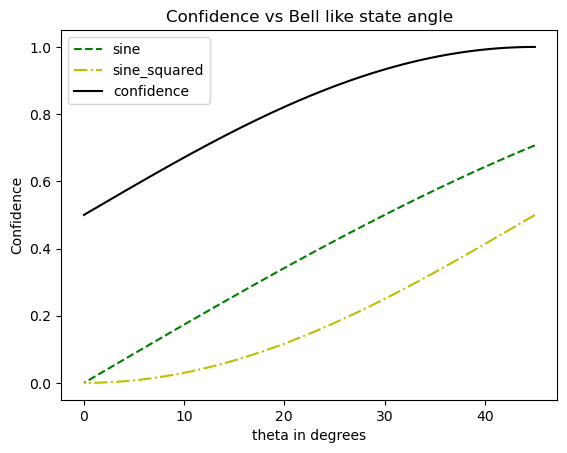

In [103]:
x = []
y = []
theta_list = np.linspace(45,0,451)
splitters_choice = Data.big_phi_abstract[1405]
third_detector_outs = [four_list(splitters_choice, Bell_or_BellLike= 'BL', theta= i, rounding= True, compared= True) for i in theta_list]
confidence_list = [Confidence(i, port=3, state_number= 3) for i in third_detector_outs]
# confidence_list = [((i[2][2])**2/(sum([j**2 for j in i[2]]))) for i in third_detector_outs]    # alternate, direct way
plt.plot(theta_list, np.sin((theta_list)*np.pi/180),'--g', label = "sine");
plt.plot(theta_list, (np.sin(theta_list*np.pi/180))**2,'-.y', label = "sine_squared");
plt.plot(theta_list,confidence_list, '-k', label = "confidence");
plt.title('Confidence vs angle, choice#1405, third deterctor, for #3 state (psi_plus)')
plt.ylabel('Confidence')
plt.xlabel('theta (in degrees)')
plt.legend()
